In [ ]:
import yaml
import pandas as pd
import psycopg2
from sqlalchemy import create_engine
import sqlalchemy

In [ ]:
with open('credentials.yaml', 'r') as f:
    credentials = yaml.safe_load(f)

In [ ]:
class RDSDatabaseConnector:
    def __init__(self, credentials):
        self.credentials = credentials

    #PROBLEM WITH STRING LITERAL EU-WEST1 AND INDENTATION IN NEXT CODE
    def _create_engine(self):
        engine = create_engine(f"postgresql+psycopg2://{self.credentials['RDS_USER']}:{self.credentials['RDS_PASSWORD']}@{self.credentials['RDS_HOST']}:{self.credentials['RDS_PORT']}/{self.credentials['RDS_DATABASE']}")
        return engine
    
    def initialise_engine(self):
        self.engine = self._create_engine()

    def data_extraction(self, table_name='loan_payments'):
        query = f"SELECT * FROM loan_payments;"
        data = pd.read_sql(query, self.engine)
        return data
    
    def save_to_file(self, data, file_path='loan_payments_data.csv'):
        data.to_csv(file_path, index=False)

    def load_loan_data(self, file_path='loan_payments_data.csv'):
        try:
            return pd.read_csv(file_path)
        except FileNotFoundError:
            print(f"Error: File '{file_path}' not found.")
            return None


In [ ]:
loan_data = RDSDatabaseConnector(credentials)
loan_data._create_engine()
loan_data.initialise_engine()
loan_data.data_extraction()
loan_data.data_extraction('loan_payments')
loan_data.save_to_file(data=loan_data.data_extraction('loan_payments'), file_path='loan_payments_data.csv')
loaded_data = loan_data.load_loan_data('loan_payments_data.csv')
print(loaded_data) 

In [ ]:
loans_df = pd.read_csv('loan_payments_data.csv', index_col='id')
loans_df.tail(10).describe()


In [ ]:
loans_df['term'] = loans_df['term'].str.replace('months', '', regex=True)
loans_df['employment_length'] = loans_df['employment_length'].str.replace('years', '', regex=True)
loans_df['employment_length'] = loans_df['employment_length'].str.replace('year', '', regex=True)
loans_df.head(10)
loans_df.tail(10)

In [ ]:
class DataFrameInfo:
    def __init__(self, loans_df):
        self.loans_df = loans_df
         
    def collumn_description(self):
        return loans_df.describe()
    
    def loan_df_distinct(self):
        return loans_df.nunique(axis=0)
    
    def loans_df_shape(self):
        return loans_df.shape
    
    def loans_df_null_count(self):
        return loans_df.isnull()
    
    def loans_df_null_count_percent(self):
        return loans_df.isnull().sum()/len(loans_df)


In [ ]:
info = DataFrameInfo(loans_df)

In [ ]:
info.loan_df_distinct()

In [ ]:
info.loans_df_shape()

In [ ]:
info.loans_df_null_count()

In [54]:
info.loans_df_null_count_percent()

member_id                      0.000000
loan_amount                    0.000000
funded_amount                  0.055448
funded_amount_inv              0.000000
term                           0.087994
int_rate                       0.095314
instalment                     0.000000
grade                          0.000000
sub_grade                      0.000000
employment_length              0.039055
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_date                     0.000000
loan_status                    0.000000
payment_plan                   0.000000
purpose                        0.000000
dti                            0.000000
delinq_2yrs                    0.000000
earliest_credit_line           0.000000
inq_last_6mths                 0.000000
mths_since_last_delinq         0.571666
mths_since_last_record         0.886025
open_accounts                  0.000000
total_accounts                 0.000000


Changes:
id and member id in weird format 
change decimals (all) 
change names to be clearer
identify what 0 mean 
only need member id other id was automaticcaly generated


In [ ]:
loans_df.info()

null = funded_amounr, term, int_rate, employment_length

In [64]:
from scipy.stats import normaltest
from matplotlib import pyplot
class Plotter:
    def __init__(self, loans_df):
        self.loans_df = loans_df
    
    def null_percent_funded(self):
        return loans_df['funded_amount'].isnull().sum()/len(loans_df['funded_amount'])
        loans_df['funded_amount'].hist(bins=40)
    
    def null_percent_term(self):
        return loans_df['term'].isnull().sum()/len(loans_df['term'])
    
    def null_percent_int_rate(self):
        return loans_df['int_rate'].isnull().sum()/len(loans_df['int_rate'])
    
    def null_percent_empl_rate(self):
        return loans_df['employment_rate'].isnull().sum()/len(loans_df['employment_rate'])
    
plotted_info = Plotter(loans_df)
plotted_info.null_percent_funded()

0.05544799100145673

<Axes: >

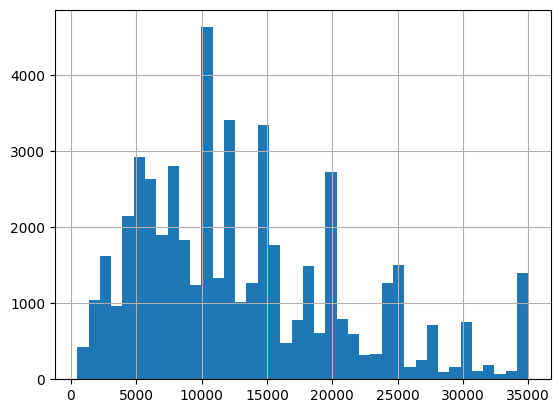

In [65]:
loans_df['funded_amount'].hist(bins=40)